In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import networkx as nx

In [2]:
from model import Model

In [3]:
m = Model()
genes_12 = ['CLN3', 'CLN1', 'SWI5', 'CLN2', 'CDH1',  'CDC20', 'CLB5', 'CLB6', 'SIC1', 'CLB1', 'CLB2', 'MCM1']

## Extracting subnetwork based on modularity

In [4]:
try:
    subnetwork_nodes = pickle.load(open("subnetwork_nodes.pkl", "rb"))
except (OSError, IOError) as e:
    from subnetwork_modularity import grow_subnetwork

    subnetwork_nodes, modularity = grow_subnetwork(m.graph, genes_12)
    print("number of nodes in subnetwork: ", len(list(subnetwork_nodes)))
    print("modularity: ", modularity)

    with open('subnetwork_nodes.pkl', 'wb') as f:
        pickle.dump(subnetwork_nodes, f)

current modularity:  0.005490181259810234
current modularity:  0.00833841159922153
current modularity:  0.00849469064083597
current modularity:  0.00857597437898174
current modularity:  0.00893622389579115
current modularity:  0.008974685209154966
current modularity:  0.009067747600159782
current modularity:  0.009116957871990558
current modularity:  0.00961057323774461
current modularity:  0.009782358436544755
current modularity:  0.009828524073898167
current modularity:  0.00986753168711335
current modularity:  0.010336911581267639
current modularity:  0.010696226666128034
current modularity:  0.010709069100906764
current modularity:  0.011020902102931334
current modularity:  0.011094125994341073
current modularity:  0.011126788729939349
current modularity:  0.011137388408466849
current modularity:  0.012002569594735326
current modularity:  0.01210945219242728
current modularity:  0.012952915059884653
current modularity:  0.012960351581070137
current modularity:  0.012982800264580483

current modularity:  0.03681080449570006
current modularity:  0.03681632593846135
current modularity:  0.03684238298363495
current modularity:  0.036882001776380575
current modularity:  0.036925689178447005
current modularity:  0.03696188263837897
current modularity:  0.03696658375646934
current modularity:  0.03702250553103639
current modularity:  0.037032544000206
current modularity:  0.0378826052877635
current modularity:  0.03795776755675401
current modularity:  0.038034329755625935
current modularity:  0.03804453589091707
current modularity:  0.038048785214503944
current modularity:  0.03805986206583669
current modularity:  0.038092746401620095
current modularity:  0.03809633634256236
current modularity:  0.038107679386133284
current modularity:  0.03812532111936806
current modularity:  0.03813632185126728
current modularity:  0.038152769927257364
current modularity:  0.03818993886739225
current modularity:  0.03819498717842895
current modularity:  0.038472484336207376
current mod

current modularity:  0.06272205258511244
current modularity:  0.06276234029017164
current modularity:  0.06276657242946349
current modularity:  0.06294029839858661
current modularity:  0.06294507138565618
current modularity:  0.06295260244292428
current modularity:  0.06296547144710221
current modularity:  0.06298488840944276
current modularity:  0.06299538684259025
current modularity:  0.06305529058250216
current modularity:  0.06306184528345941
current modularity:  0.06308122846003582
current modularity:  0.06308589823095043
current modularity:  0.06309073413678186
current modularity:  0.06310606293895171
current modularity:  0.06311220521726263
current modularity:  0.063132881188819
current modularity:  0.06320500383203176
current modularity:  0.06324699973909267
current modularity:  0.06325643833606129
current modularity:  0.06341075981589127
current modularity:  0.06341484652857418
current modularity:  0.06341520237686614
current modularity:  0.06343710343371095
current modularity

## Studying feedback loop

In [5]:
try:
    cycles = pickle.load(open("cycles.pkl", "rb"))
except (OSError, IOError) as e:
    cycles = []
    for gene in (m.graph).predecessors("SWI5"):
        cycles.append(list(nx.all_simple_paths(m.graph, source="SWI5", target=gene, cutoff=4))) # change cutoff to 5 to get results commented in the report, but this might take several hours to compute

    with open('cycles.pkl', 'wb') as f:
        pickle.dump(cycles, f)

In [6]:
def rank_cycles(loops):
    flat_list = [item for sublist in loops for item in sublist]
    scores = []
    normalization = np.mean(list(nx.get_edge_attributes(m.graph, "alpha").values()))
    for idx, sublist in enumerate(flat_list):
        # score measures the strength of the loop
        score = 1
        previous = sublist[-1]
        for node in sublist:
            score = score * m.graph.get_edge_data(previous, node, default = 0)['alpha'] / normalization
            previous = node
        scores.append([score, idx])
    scores.sort(reverse=True, key= lambda x: abs(x[0]))
    return scores

In [7]:
rank = rank_cycles(cycles)
flat_list = [item for sublist in cycles for item in sublist]
for i in rank[0:30]:
    print(flat_list[i[1]])

['SWI5', 'PRP9', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'YNL046W', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'HXT2', 'YGL117W', 'CPA2', 'PCL5']
['SWI5', 'YJL218W', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'AIM44', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'FRE1', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'FUS1', 'YGL117W', 'CPA2', 'PCL5']
['SWI5', 'YMR122W-A', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'FIG2', 'SAG1', 'CPA2', 'PCL5']
['SWI5', 'YJL043W', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'PIR1', 'FRE1', 'REE1', 'PCL5']
['SWI5', 'PIR1', 'REE1', 'FRE1', 'PCL5']
['SWI5', 'PIR1', 'SUR2', 'ANB1', 'PCL5']
['SWI5', 'HXT2', 'FRE1', 'REE1', 'PCL5']
['SWI5', 'HXT2', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'ASH1', 'HXT2', 'CPA2', 'PCL5']
['SWI5', 'PIR1', 'SUR2', 'IDH1', 'PCL5']
['SWI5', 'PIR1', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'PIR1', 'SUR2', 'REE1', 'PCL5']
['SWI5', 'FUS1', 'SAG1', 'CPA2', 'PCL5']
['SWI5', 'HXT2', 'PHM6', 'CPA2', 'PCL5']
['SWI5', 'ASH1', 'ASN1', 'CPA2', 'PCL5']
['SWI5', 'CUP1-1', 'CTR1', 'REE1', 'PCL5']
['SWI5', 'SPO16', 'NRK1', 'CPA2', 

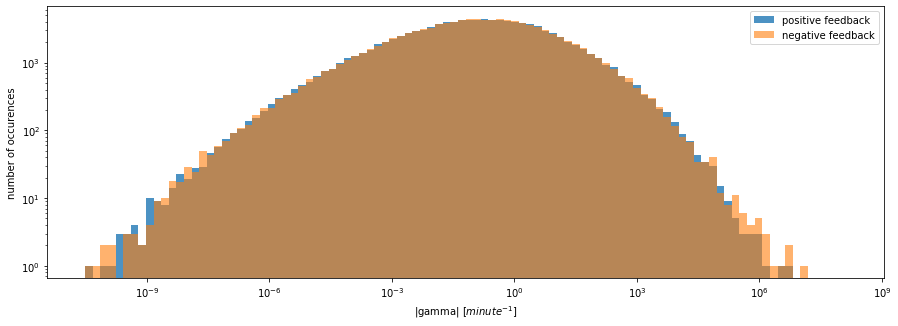

In [8]:
data = [item[0] for item in rank]
data_neg = []
data_pos = []
for score in data:
    if score > 0:
        data_pos.append(score)
    if score < 0:
        data_neg.append(abs(score))

plt.figure(figsize=(15,5))
hist, bins = np.histogram(data_pos+data_neg, bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_pos, bins=logbins, alpha=0.8)
plt.hist(data_neg, bins=logbins, alpha=0.6)
plt.legend(["positive feedback", "negative feedback"])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("|gamma| [$minute^{-1}$]")
plt.ylabel("number of occurences")
#plt.title("Histogram of the scores of feedback loops affecting node SWI5 \n(with cutoff length of 6)")
plt.savefig("histogram.png", dpi=300)
plt.show()

## Create image of the network

In [9]:
nodes = ["SWI5", "PRP9", "CTR1", "REE1", "PCL5", "FRE1"]
m = Model(nodes_subgraph=nodes)

m.draw("network")

file 'network.svg' was successfully created


## Visualize evolution of the system

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
m = Model()

lst_index_12_genes = [m.graph.node[element]['index'] for element in genes_12]
lst_index_12_genes

m.cycle(dt= 1, perturbed_gene="SWI5", track = lst_index_12_genes, num_step = int(1e4))

10.0% are done
20.0% are done
30.0% are done
40.0% are done
50.0% are done
60.0% are done
70.0% are done
80.0% are done
90.0% are done
100.0% are done


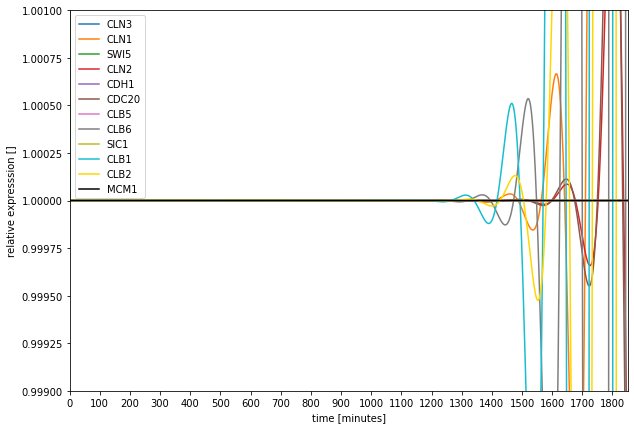

In [12]:
m.visualize(legends=genes_12)

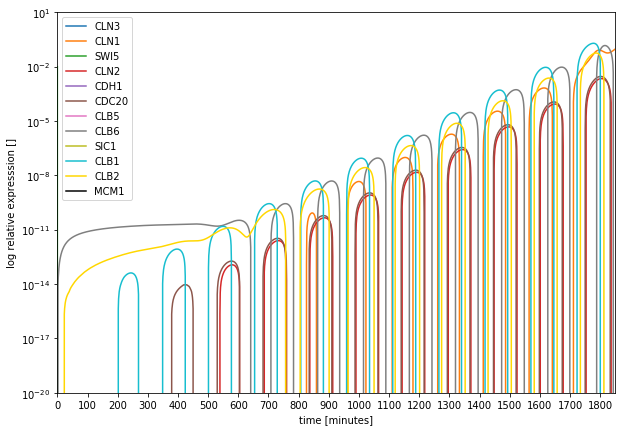

In [13]:
m.visualize_double_log(legends=genes_12)